# PDE: Separation of Variables

* Author: Pochung Chen
* Email: pcchen@phys.nthu.edu.tw

Last updated on 11/21/2021

## Rectangle

Consider the 2D Laplace equation
$$
  \frac{\partial^2 u(x,y)}{\partial x^2} + \frac{\partial^2 u(x,y)}{\partial y^2} = 0 
$$

within the domain $0 \le x \le a$ and $0\le y \le b$,
and with boundary conditions
* $u(x,0) = 0$
* $u(x,b) = 0$
* $u(a,y) = 0$
* $u(0,y) = f(y)$.

The solution is
$$
  u(x,y)=\sum_{n=1}^{\infty} B_n 
  \sinh\left[ n \pi \frac{a-x}{b} \right] 
  \sin\left[ n \pi \frac{y}{b} \right],
$$
where
$$
  B_n = \frac{2}{b\sinh[n\pi a/b]} \int_0^b f(y)   \sin\left[ n \pi \frac{y}{b} \right] dy
$$

For the case where $f(y)=u_0$
$$
  u(x,y)=\sum_{n \text{odd}}
  \frac{4u_0}{n\pi\sinh[n\pi a/b]}
  \sinh\left[ n \pi \frac{a-x}{b} \right] 
  \sin\left[ n \pi \frac{y}{b} \right],
$$

Text(0, 0.5, 'y')

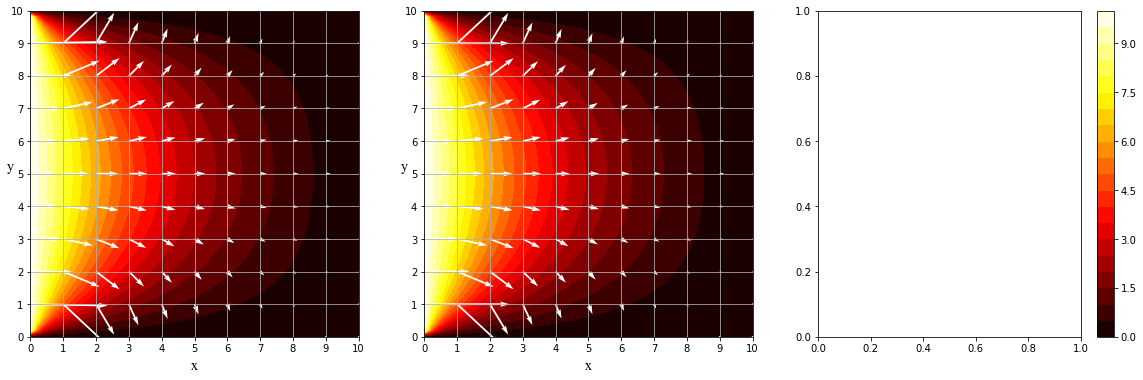

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

fig, p = plt.subplots(ncols=3, nrows=1, figsize=(20, 6))

a = 10
b = 10
u0 = 10

fineness = 0.2
a_total = (a)/fineness + 1
b_total = (b)/fineness + 1

iterationPDE = 200
levels = 20

x = np.linspace(0, a, int(a_total))
y = np.linspace(0, b, int(b_total))
X, Y = np.meshgrid(x, y)
V = np.zeros_like(X)

for i in range(1, iterationPDE, 2):
    Bn = 4*u0 / (i*np.pi*np.sinh(i*np.pi*a / b))
    V = V + Bn*np.sinh(i*np.pi*(a - X) / b)*np.sin(i*np.pi*Y / b)

Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))
    
P0 = p[0].contourf(X, Y, V, levels, cmap=cm.hot)
fig.colorbar(P0)

p[0].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'w', scale=5)

p[0].set_xticks(np.linspace(0, a, 11))
p[0].set_yticks(np.linspace(0, b, 11))
p[0].grid()

##################

iteration = 1000

x_start = 0
x_end   = +10
x_total = (x_end - x_start)/fineness + 1

y_start = 0
y_end   = +10
y_total = x_total

x = np.linspace(x_start, x_end, int(x_total))
y = np.linspace(y_start, y_end, int(y_total))

X, Y = np.meshgrid(x, y, indexing = 'xy')
V = np.zeros_like(X)

# 邊界條件
BCL, BCR, BCU, BCD = (10, 0, 0, 0)
V[:, 0] = BCL
V[:, int(y_total)-1] = BCR
V[0, :] = BCD
V[int(x_total)-1, :] = BCU

for s in range(1, iteration):
    for i in range(1, int(x_total)-1):
        for j in range(1, int(y_total)-1):
            V[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4
            
Ey, Ex = np.gradient(-V)
skip = (slice(None, None, 5),slice(None, None, 5))

p[1].set_xticks(np.linspace(x_start, x_end, 11))
p[1].set_yticks(np.linspace(x_start, x_end, 11))
pvj = p[1].contourf(X, Y, V, levels, cmap=cm.hot)
p[1].quiver(X[skip], Y[skip], Ex[skip], Ey[skip], color = 'w', scale=5)

p[1].grid()

p[0].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[0].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)
p[1].set_xlabel('x', fontsize = 14, labelpad = 5, fontname = 'Times New Roman')
p[1].set_ylabel('y', fontsize = 14, labelpad = 0, fontname = 'Times New Roman', rotation = 0)

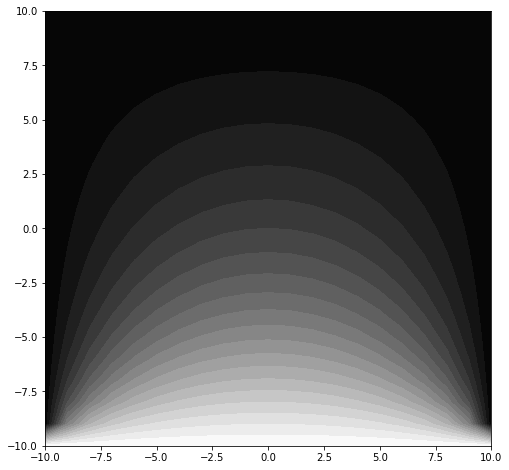

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import timeit

def relax(total, iteration):
    x_start = -10
    x_end   = +10
    x_total = total

    y_start = -10
    y_end   = +10
    y_total = x_total

    x = np.linspace(x_start, x_end, int(x_total))
    y = np.linspace(y_start, y_end, int(y_total))

    X, Y = np.meshgrid(x, y, indexing = 'xy')
    V = np.zeros_like(X)
    
    BCL, BCR, BCU, BCD = (0, 0, 0, 10)
    V[:, 0] = BCL
    V[:, int(y_total)-1] = BCR
    V[0, :] = BCD
    V[int(x_total)-1, :] = BCU

    for s in range(1, iteration):
        for i in range(1, int(x_total)-1):
            for j in range(1, int(y_total)-1):
                V[j, i] = (V[j-1, i] + V[j+1, i] + V[j, i-1] + V[j, i+1])/4

    fig, pp = plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
    pp.contourf(X, Y, V, levels, cmap=cm.gray)

relax(21, 1000)

In [38]:
%timeit relax(11, 10)

1.49 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%timeit relax(21, 10)

6.48 ms ± 968 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%timeit relax(31, 10)

14.5 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%timeit relax(41, 10)

29.6 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
%timeit relax(51, 10)

39.3 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
%timeit relax(61, 10)

62.6 ms ± 9.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
%timeit relax(71, 10)

80 ms ± 3.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
%timeit relax(81, 10)

108 ms ± 14.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%timeit relax(91, 10)

149 ms ± 18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
%timeit relax(101, 10)

175 ms ± 17.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


[]

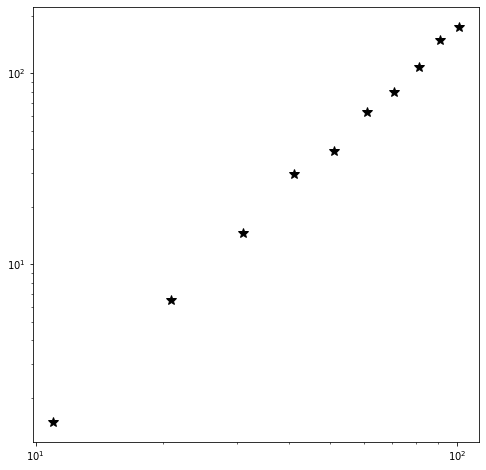

In [58]:
Numb = [11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
time = [1.49, 6.48, 14.5, 29.6, 39.3, 62.6, 80, 108, 149, 175]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 8))
ax.plot(Numb, time,'*k', ms = 10)
ax.loglog()